Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


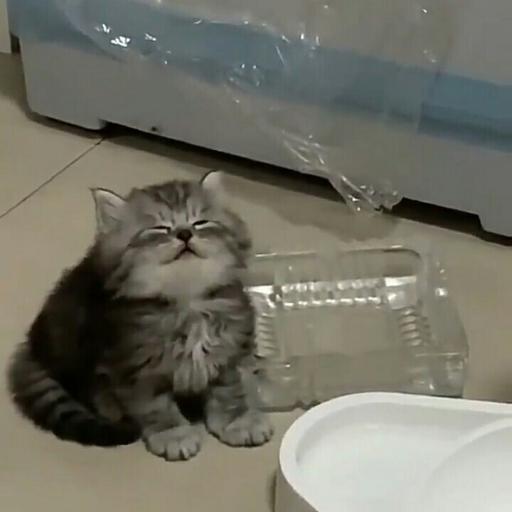

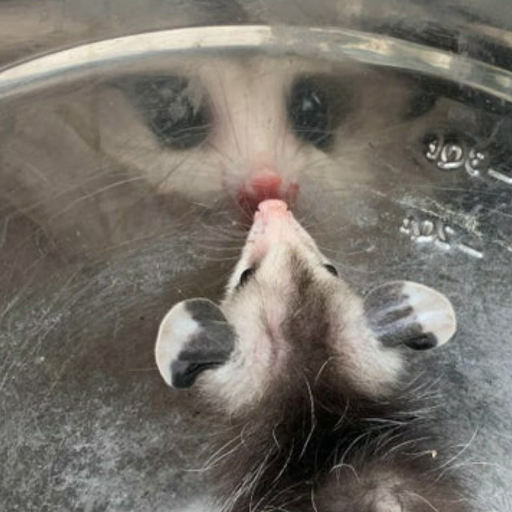

In [12]:
import cv2
import numpy as np
from google.colab import drive
from google.colab.patches import cv2_imshow
drive.mount('/content/gdrive')
cat = cv2.imread('gdrive/My Drive/lab3.jpg')
cat = cv2.resize(cat, (512, 512))
opossum = cv2.imread('gdrive/My Drive/lab2.jpg')
opossum = cv2.resize(opossum, (512, 512))
cv2_imshow(cat)
cv2_imshow(opossum)


(512, 512, 3)
(512, 512, 3)


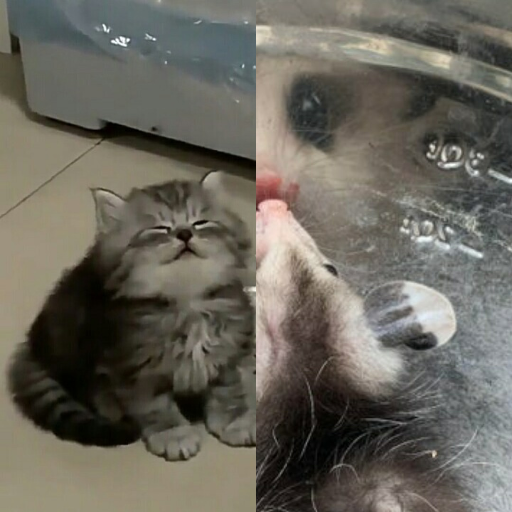

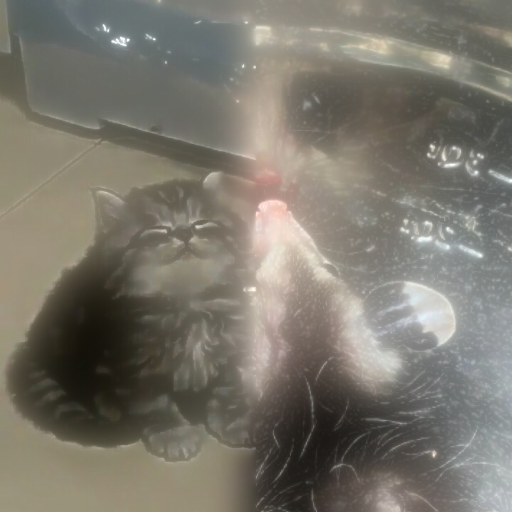

In [14]:
print(cat.shape)
print(opossum.shape)
cat_opossum = np.hstack((cat[:, :256], opossum[:, 256:]))

# generate Gaussian pyramid for apple
cat_copy = cat.copy()
gp_cat = [cat_copy]
for i in range(6):
    cat_copy = cv2.pyrDown(cat_copy)
    gp_cat.append(cat_copy)


# generate Gaussian pyramid for orange
opossum_copy = opossum.copy()
gp_opossum = [opossum_copy]
for i in range(6):
    opossum_copy = cv2.pyrDown(opossum_copy)
    gp_opossum.append(opossum_copy)

# generate Laplacian Pyramid for apple
cat_copy = gp_cat[5]
lp_cat = [cat_copy]
for i in range(5, 0, -1):
    gaussian_expanded = cv2.pyrUp(gp_cat[i])
    laplacian = cv2.subtract(gp_cat[i-1], gaussian_expanded)
    lp_cat.append(laplacian)

# generate Laplacian Pyramid for orange
opossum_copy = gp_opossum[5]
lp_opossum = [opossum_copy]
for i in range(5, 0, -1):
    gaussian_expanded = cv2.pyrUp(gp_opossum[i])
    laplacian = cv2.subtract(gp_opossum[i-1], gaussian_expanded)
    lp_opossum.append(laplacian)

# Now add left and right halves of images in each level
cat_opossum_pyramid = []
n = 0
for cat_lap, opossum_lap in zip(lp_cat, lp_opossum):
    n += 1
    cols, rows, ch = cat_lap.shape
    laplacian = np.hstack((cat_lap[:, 0:int(cols/2)], opossum_lap[:, int(cols/2):]))
    cat_opossum_pyramid.append(laplacian)
# now reconstruct
cat_opossum_reconstruct = cat_opossum_pyramid[0]
for i in range(1, 6):
    cat_opossum_reconstruct = cv2.pyrUp(cat_opossum_reconstruct)
    cat_opossum_reconstruct = cv2.add(cat_opossum_pyramid[i], cat_opossum_reconstruct)

cv2_imshow(cat_opossum)
cv2_imshow(cat_opossum_reconstruct)